# Business Statement

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### How we can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [77]:
#Importing Necessary Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import the required function
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
%matplotlib inline
import seaborn as sns
sns.set(rc={'axes.facecolor':'#c5c6c7'})
import warnings
warnings.filterwarnings("ignore")

In [78]:
df = pd.read_csv('/content/drive/MyDrive/bike_sharing.csv')

df.head().style.background_gradient(cmap='bone')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.840000,14.395000,81,0.000000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.020000,13.635000,80,0.000000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.020000,13.635000,80,0.000000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.840000,14.395000,75,0.000000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.840000,14.395000,75,0.000000,0,1,1


## Column Profiling:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

    1: Clear, Few clouds, partly cloudy, partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered


In [79]:
df.shape

(10886, 12)

In [80]:
# Checking the dataframe for any null values (Hidden Input)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Visualizing Categorical Variables

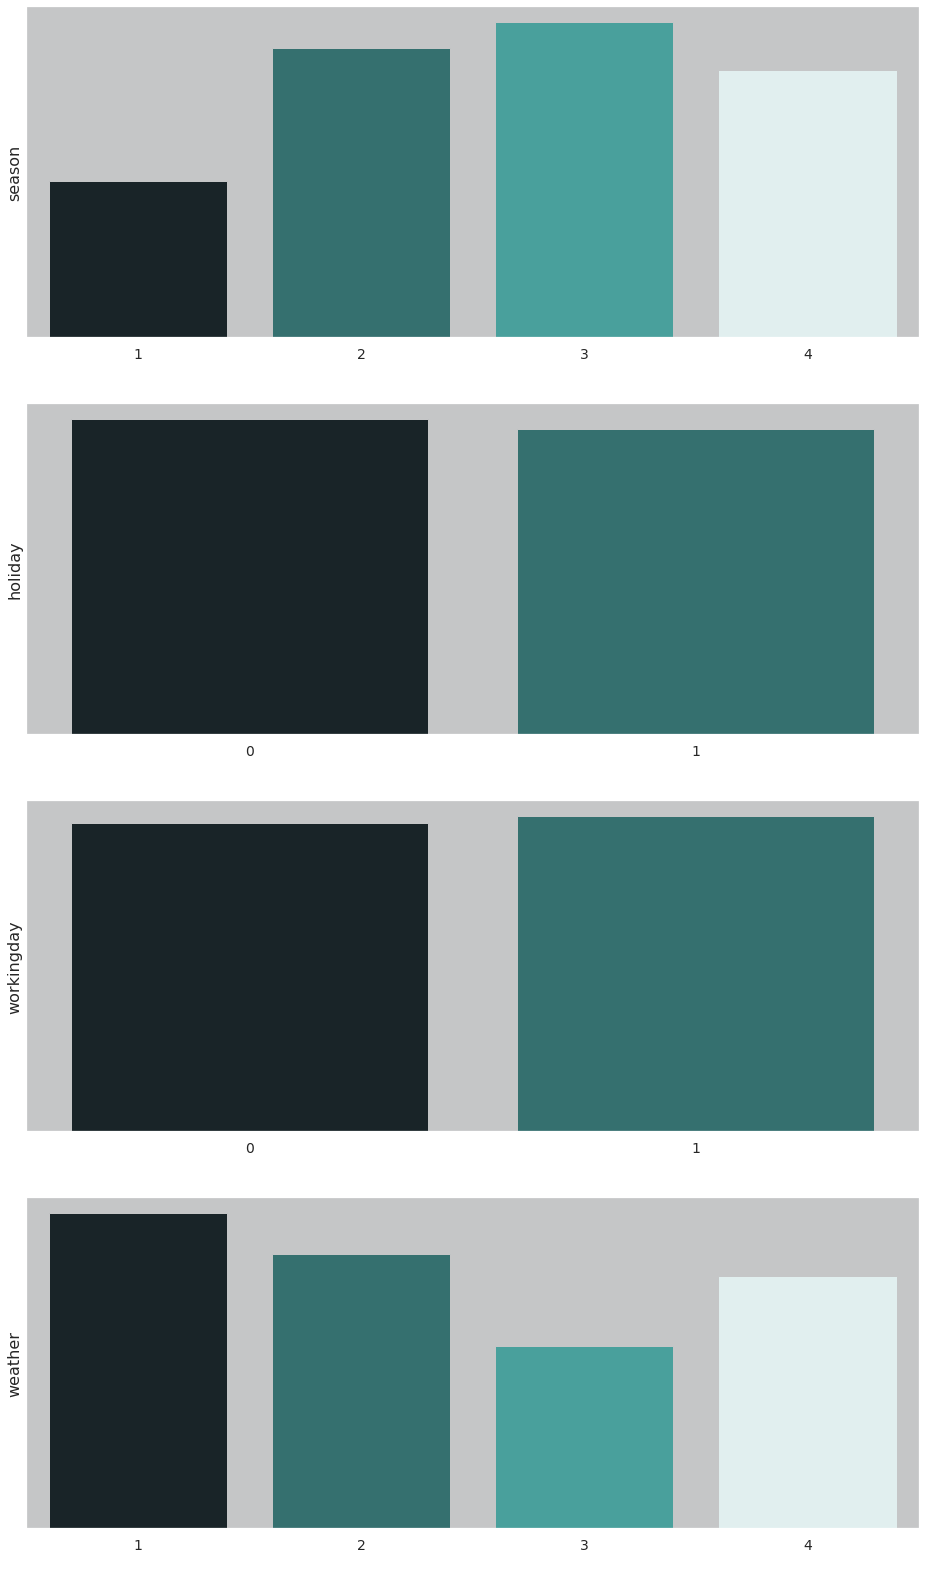

In [81]:
# Performing EDA on the Categorical columns (Hidden Input)

num_cols = list(df.select_dtypes(["int64","float64"]))
cat_cols = list(df.select_dtypes("object"))

# Columns required for Categrical visualizations

cat_col_vis = ['season','holiday','workingday','weather']

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(16, 28))
                
i = 0 #counter

for cols in cat_col_vis:
    
    sns.barplot(x=df[cols], y=df['count'], fill=True, alpha=1, ci=None, ax=ax[i], palette=('#17252a', '#2b7a78','#3aafa9',
                                                                                                     '#def2f1','#feffff'),
                                                                                            edgecolor="#c5c6c7")
                
    ax[i].set_xlabel(' ')
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].set_ylabel(cols, fontsize=16)    
    ax[i].grid(False)
  #  ax[i].bar_label(ax[i].containers[0], size="12")
    i=i+1
    
      
plt.show()

### Visualizing Numerical Variables

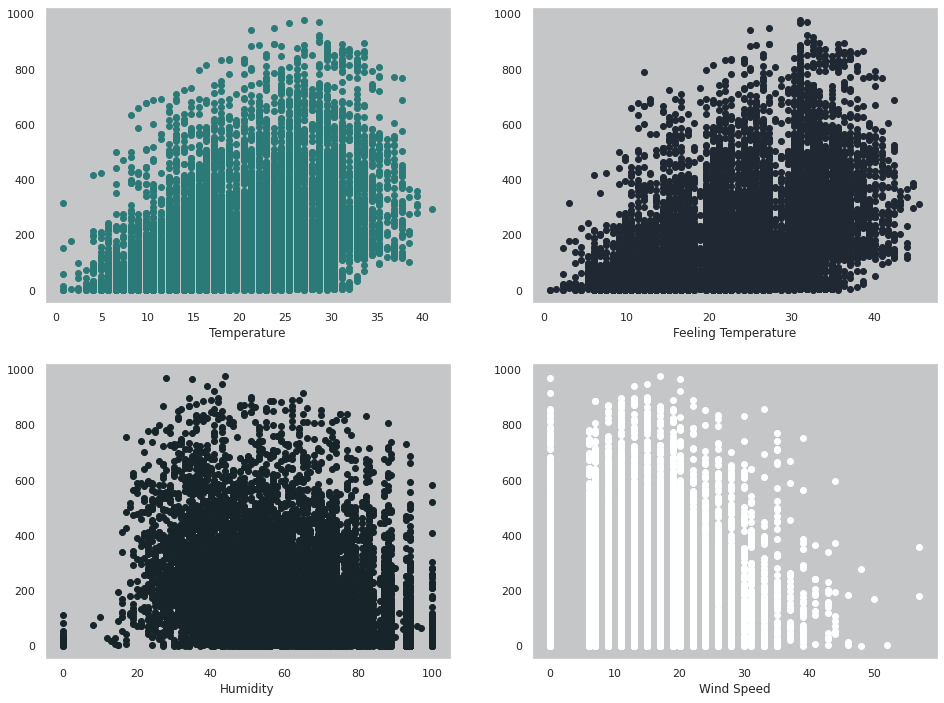

In [82]:
# Visualizing the Numerical Columns (Hidden Input) and treating outliers

plt.figure(figsize=[16,12])
plt.subplot(2,2,1)
plt.scatter( x=df['temp'], y=df['count'], c="#2b7a78")
plt.xlabel("Temperature")
plt.grid(False)
plt.subplot(2,2,2)
plt.scatter( x=df['atemp'], y=df['count'], c='#1f2833')
plt.xlabel("Feeling Temperature")
plt.grid(False)
plt.subplot(2,2,3)
plt.scatter( x=df['humidity'], y=df['count'], c='#17252a')
plt.xlabel("Humidity")
plt.grid(False)
plt.subplot(2,2,4)
plt.scatter( x=df['windspeed'], y=df['count'], c='#feffff')
plt.xlabel("Wind Speed")
plt.grid(False)
plt.show()

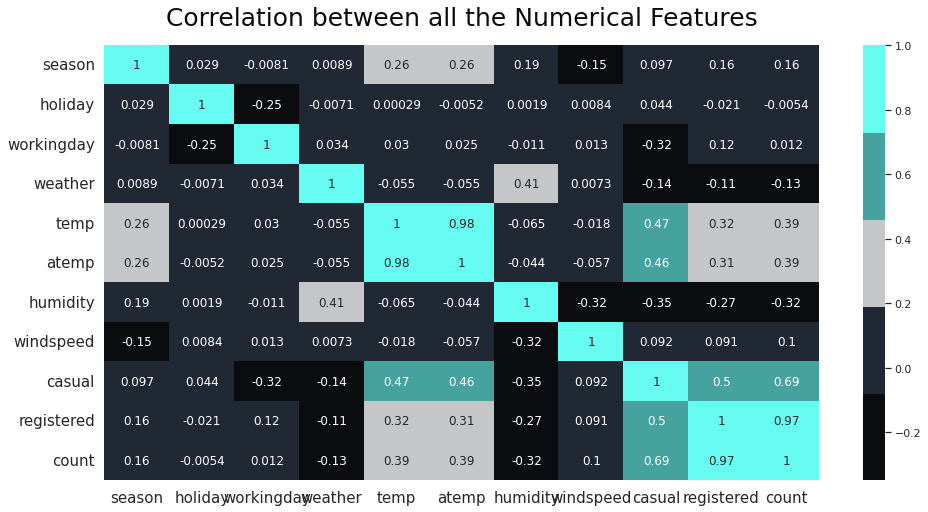

In [83]:
heat = df.corr()
plt.figure(figsize=[16,8])
plt.title("Correlation between all the Numerical Features", size=25, pad=20, color='#0b0c10')
sns.heatmap(heat, cmap=['#0b0c10', '#1f2833','#c5c6c7','#45a29e','#66fcf1'], annot=True)
plt.xticks(size=15)
plt.yticks(size=15, rotation=360)
plt.show()

Actual temperature and the feeling temperature has very high correlation within themselves, so it is better to drop one to remove any sort of multicollinearity.

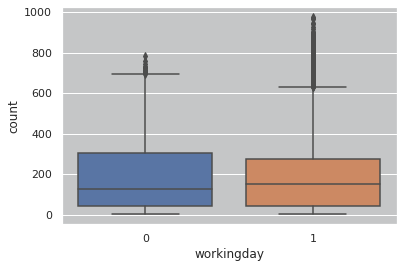

In [84]:
sns.boxplot(x='workingday', y='count', data =df)


In [85]:
q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)
iqr=q3-q1
df=df[(df['count']>(q1-1.5*iqr) ) & (df['count']<(q3+1.5*iqr))]
df.shape

(10583, 12)

In [86]:
df.workingday.value_counts()


1    7161
0    3422
Name: workingday, dtype: int64

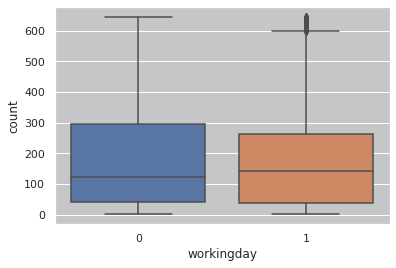

In [87]:
sns.boxplot(x='workingday', y='count', data =df)

With visual analysis we see that the count doesn't depend much on the working day.

Need to check using statistical methods


%important Points

The t test as compared with z test is its advantage for small sample comparison.

 As n increases,
t approaches to z. The advantage of t test disappears, and t distribution simply becomes z
distribution. In other words, with large n. t test is just close to z test. and one don't loose anything
to continue to use t test. In the past, for convenience, we use z table when n > 30. We don't have
to do it anymore. In fact, all statistical packages use t test even n is large. 

This is easy,
convenience with computer programming, and is correct. All statistical packages are good
references.

### Step 1: Define the null and alternate hypotheses


H0:  The count on weekday is equal to the count on weekend.

Ha:  The count on weekday is greater than count on weekend.

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. 

As
the population standard deviations are unknown, the two sample independent t-test will be the
appropriate test for this problem.

### Step 3:Decide the significance level

As given in the problem statement, we select α = 0.05

### Step 4: Collect and prepare data

In [88]:
weekday = df[df['workingday'] == 1]['count'].sample(3422) #Taking same sample size for both hypothesis 
weekend = df[df['workingday'] == 0]['count'].sample(3422)


In [89]:
print('The sample standard deviation of the count on weekday is:', round(weekday.std(),2));
print('The sample standard deviation of the count on weekend is:', round(weekend.std(),2))

The sample standard deviation of the count on weekday is: 151.48
The sample standard deviation of the count on weekend is: 163.78


As the sample standard deviations are different, the population standard deviations may be
assumed to be different.

### Step 5: Calculate the p-value

In [90]:

# find the p-value
test_stat, p_value = ttest_ind(weekday, weekend, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)


The p-value is 0.965070410562645


In [91]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we  fail to reject null hypothesis')


As the p-value 0.965070410562645 is greater than the level of significance, we  fail to reject null hypothesis


## Is the demand of electric cycles same for different weather

In [92]:
df.weather.value_counts()


1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

Droping weather 4 due to less no of sample size

In [93]:
df=df[~(df['weather']==4)]

In [94]:
w1 = df[df['weather'] == 1]['count'].sample(850)
w2= df[df['weather'] == 2]['count'].sample(850)
w3 = df[df['weather'] == 3]['count'].sample(850)


In [95]:
df.groupby(['weather'])['count'].describe()


,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


### Step 1: Define the null and alternate hypotheses


H0: The mean count in different weather are equal.

Ha: The mean count in different weather are different.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate
test here provided normality and equality of variance assumptions are verified.

1.   For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
2.   For equality of variance, Levene test is applied to the response variable



Shapiro-Wilk’s test

In [96]:
# Assumption 1: Normality

In [97]:
w, p_value = shapiro(df['count'].sample(4999)) 
print('The p-value is', p_value)

The p-value is 0.0


As p-value is 0.0, se we reject the hypothesis. as distribution is not normal.

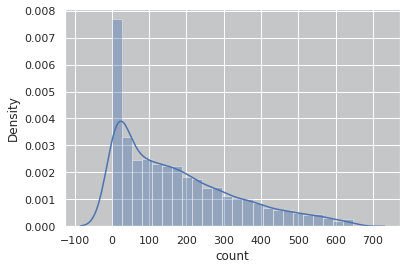

In [98]:
sns.distplot(df['count'].sample(4999))


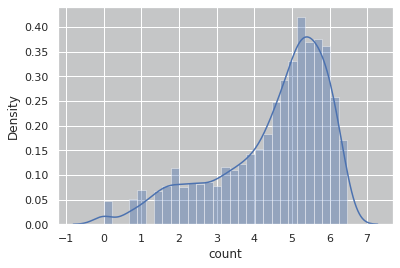

In [99]:
sns.distplot(np.log(df['count'].sample(4999)))


We will continue our analysis even our assumption is failed

Levene’s test

We will test the null hypothesis 

H0:  All the count variances are equal


against the alternative hypothesis

Ha: At least one variance is different from the rest


In [100]:
#Assumption 2: Homogeneity of Variance
statistic, p_value = levene( w1, 
                             w2, 
                             w3)


In [101]:
#find the p-value
print('The p-value is', p_value)

The p-value is 2.8869764913811756e-21


In [102]:
p_value>0.05

False

In [103]:
print(w1.var(), w2.var(), w3.var())


25382.21334580475 22434.382562183884 14697.534623432412


Our null hyphothesis is true for this scenario, All the count variance are equal

ANOVA

In [104]:
# find the p-value
test_stat, p_value = f_oneway(w1,w2,w3)
# print the p-value
print('The p-value is', p_value)

The p-value is 3.9440654151846526e-26


In [105]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject our null hypotheis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject our null hypothesis')


As the p-value 3.9440654151846526e-26 is less than the level of significance, we reject our null hypotheis


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis.
Hence, we have enough statistical evidence to say that the mean count of rented bicycles are not
equal.

In [106]:
df.weather.value_counts()

1    6962
2    2770
3     850
Name: weather, dtype: int64

In [107]:
df.season.value_counts()

1    2669
4    2664
2    2633
3    2616
Name: season, dtype: int64

In [108]:
df.groupby(['weather'])['season'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,2.489802,1.107611,1.0,1.0,3.0,3.0,4.0
2,2770.0,2.519495,1.154927,1.0,1.0,2.0,4.0,4.0
3,850.0,2.501176,1.126038,1.0,2.0,2.0,4.0,4.0


In [109]:
df.groupby(['season'])['weather'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2669.0,1.425628,0.634611,1.0,1.0,1.0,2.0,3.0
2,2633.0,1.431447,0.644086,1.0,1.0,1.0,2.0,3.0
3,2616.0,1.370413,0.618414,1.0,1.0,1.0,2.0,3.0
4,2664.0,1.461336,0.643876,1.0,1.0,1.0,2.0,3.0


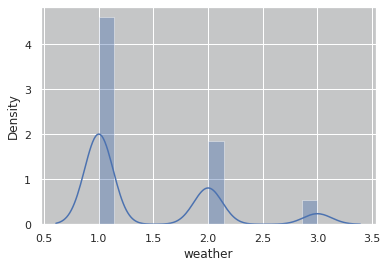

In [110]:
sns.distplot(df['weather'].sample(2616))


In [113]:
# create contingency table
data_crosstab = pd.crosstab(df['season'],
                            df['weather'],
                           margins=True, margins_name="Total")

In [114]:
data_crosstab

weather,1,2,3,Total
season,,,,
1,1744,714,211,2669
2,1720,690,223,2633
3,1842,579,195,2616
4,1656,787,221,2664
Total,6962,2770,850,10582


 CHI SQUARED TEST

H0: Weather is dependent on the season.

Ha: Weather is independent on the season.

In [115]:
chi, pval,dof,exp = chi2_contingency(data_crosstab)

In [116]:
significance = 0.05
print('p-value= %.6f, significance = %.2f \n' % (pval, significance))

if pval < significance : 
  print("""At %.2f level of significance, we reject the null hypothesis and accept Ha. These are not independent.""" %(significance))
else:
  print("""At %.2f level of significance, we accept the null hypothesis  These are independent.""" %(significance)) 
  

p-value= 0.000014, significance = 0.05 

At 0.05 level of significance, we reject the null hypothesis and accept Ha. These are not independent.


Since the p-value is less than the 5% significance level, we fail to reject the null hypothesis.
Hence, we have enough statistical evidence to say that the Weather and Season are dependant

End